# ***projet : Analysis on Covid-19 Data Through Web Scraping (python)***

*Le Web scraping (de l’anglais scraping = « gratter/racler ») consiste à extraire des données de sites Internet et à les enregistrer afin de les analyser ou de les utiliser de toute autre façon. Le scraping permet de collecter des informations de nature bien différente. Il peut par ex. s’agir de coordonnées comme des adresses e-mail ou des numéros de téléphone, mais aussi de mots-clés individuels ou d’URL. Ces informations sont alors rassemblées dans des bases de données locales ou des tableaux.*

# I- Extraction des données à partir du site web "https://www.worldometers.info/coronavirus"

1- Importation des packages

In [ ]:
#importer les packages ( requests,pandas,BeautifulSoup,matplotlib)
import requests
import pandas as pd
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact,widgets
import seaborn as sns



2- Génération de la base de donnée

b'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>COVID Live - Coronavirus Statistics - Worldometer</title>\n<meta name="description" content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates">\n\n<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n<link rel="apple-touch-icon" sizes="60x60" href="/favicon/appl
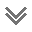

In [ ]:
#La page Web que nous allons ouvrir se trouve à l'URL suivante 
import requests
page = requests.get("https://www.worldometers.info/coronavirus")
page.status_code
page.content

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   COVID Live - Coronavirus Statistics - Worldometer
  </title>
  <meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="app
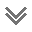

In [ ]:
#importer la bibliothèque BeautifulSoup
from bs4 import BeautifulSoup
#Instauration de la classe BeautifulSoup
soup = BeautifulSoup(page.content, 'lxml')
#Où soupe est une variable contenant le code HTML de la page Web
#Formatons-le bien, en utilisant la méthode prettify comme contraste comme cellule 3
print(soup.prettify())

In [ ]:
#Rechercher la table et à extraire
table = soup.find('table', attrs={'id': 'main_table_countries_today'})
table

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

************Extraction de la table************** 

In [ ]:
rows = table.find_all("tr", attrs={"style": ""})  # Extraction du texte HTML qui represente la table
data = []
for i,item in enumerate(rows):
    
    if i == 0:
        
        data.append(item.text.replace(",","").strip().split("\n")[:13])    # La fonction text.strip().split("\n") transform le texte en une liste des chaines de caractères
        
    else:                                                  #L'insertion ligne par ligne dans data
        data.append(item.text.replace(",","").strip().split("\n")[:12])       
data

[['#',
  'CountryOther',
  'TotalCases',
  'NewCases',
  'TotalDeaths',
  'NewDeaths',
  'TotalRecovered',
  'NewRecovered',
  'ActiveCases',
  'SeriousCritical',
  'Tot\xa0Cases/1M pop',
  'Deaths/1M pop',
  'TotalTests'],
 ['World',
  '527380611',
  '+385940',
  '6300088',
  '+330',
  '497341739',
  '+505091',
  '23738784',
  '38061',
  '67658',
  '808.2',
  ''],
 ['1',
  'USA',
  '84984459',
  '',
  '1028902 ',
  '',
  '81586249',
  '',
  '2369308',
  '2307',
  '253947',
  '3075'],
 ['2',
  'India',
  '43136371',
  '',
  '524413 ',
  '',
  '42597003',
  '',
  '14955',
  '698',
  '30690',
  '373'],
 ['3',
  'Brazil',
  '30780028',
  '',
  '665657 ',
  '',
  '29801225',
  '',
  '313146',
  '8318',
  '142896',
  '3090'],
 ['4',
  'France',
  '29337985',
  '',
  '147780 ',
  '',
  '28534231',
  '',
  '655974',
  '1173',
  '447599',
  '2255'],
 ['5',
  'Germany',
  '26085508',
  '+3191',
  '138712 ',
  '+3',
  '24602500',
  '+26900',
  '1344296',
  '944',
  '309481',
  '1646'],
 ['6',
  

Installation du package dask.dataframe

In [ ]:
!pip install dask 


In [ ]:
!pip install "dask[dataframe]"



     |████████████████████████████████| 140 kB 5.9 MB/s 


La transformation de la liste data sous format dataFrame avec le package pandas

In [ ]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import dask.dataframe as dd

dt = pd.DataFrame(data)          # Transformer data sous format dataframe
dt = pd.DataFrame(data[1:], columns=data[0][:12]) #les lignes sont data[1:] et les colonnes sont le  header data[0][:12]
dt.head()

# CountryOther TotalCases NewCases TotalDeaths  NewDeaths  \
0  World    527380611    +385940  6300088        +330  497341739   
1      1          USA   84984459             1028902               
2      2        India   43136371              524413               
3      3       Brazil   30780028              665657               
4      4       France   29337985              147780               

  TotalRecovered NewRecovered ActiveCases SeriousCritical Tot Cases/1M pop  \
0        +505091     23738784       38061           67658            808.2   
1       81586249                  2369308            2307           253947   
2       42597003                    14955             698            30690   
3       29801225                   313146            8318           142896   
4       28534231                   655974            1173           447599   

  Deaths/1M pop  
0                
1          3075  
2           373  
3          3090  
4          2255

In [ ]:
dt=dt[1:]

In [ ]:
dt.head(20)

# CountryOther TotalCases NewCases TotalDeaths NewDeaths TotalRecovered  \
1    1          USA   84984459             1028902                  81586249   
2    2        India   43136371              524413                  42597003   
3    3       Brazil   30780028              665657                  29801225   
4    4       France   29337985              147780                  28534231   
5    5      Germany   26085508    +3191     138712         +3       24602500   
6    6           UK   22238715              177977                  21819211   
7    7       Russia   18293450    +4710     378350        +80       17688903   
8    8     S. Korea   17957697   +19298      23965        +54       17371880   
9    9        Italy   17229263              165918                  16206476   
10  10       Turkey   15061376               98921                  14958887   
11  11        Spain   12238073              105947                  11620275   
12  12      Vietnam   10708887    +1319      43075                   9402046   
13  13    Argentina    9135308              128776                   8895999   
14  14        Japan    8587421   +34957      30292        +37        8210336   
15  15  Netherlands    8075194               22306                   8010669   
16  16         Iran    7230053     +312     141274         +3        7033986   
17  17    Australia    6948967   +38514       8097        +20        6522840   
18  18     Colombia    6099111              139833                   5930545   
19  19    Indonesia    6052590     +227     156522         +3        5892411   
20  20       Poland    6005531      +95     116268                   5335250   

   NewRecovered ActiveCases SeriousCritical Tot Cases/1M pop Deaths/1M pop  
1                   2369308            2307           253947          3075  
2                     14955             698            30690           373  
3                    313146            8318           142896          3090  
4                    655974            1173           447599          2255  
5        +26900     1344296             944           309481          1646  
6        +14713      241527             188           324383          2596  
7         +5814      226197            2300           125253          2591  
8        +49012      561852             229           349697           467  
9                    856869             301           285751          2752  
10                     3568             975           175037          1150  
11                   511851             339           261560          2264  
12        +8945     1263766             211           108185           435  
13                   110533             300           198697          2801  
14       +35915      346793              92            68291           241  
15        +2997       42219              36           469319          1296  
16        +1774       54793             670            84055          1642  
17                   418030             103           266688           311  
18                    28733             342           117509          2694  
19         +285        3657            2771            21697           561  
20          +12      554013             981           159008          3078

In [ ]:
dt.describe()

# CountryOther TotalCases NewCases TotalDeaths NewDeaths  \
count   222          222        222      222         222       222   
unique  222          222        222       40         211        15   
top       1          USA   84984459                                  
freq      1            1          1      180           4       198   

       TotalRecovered NewRecovered ActiveCases SeriousCritical  \
count             222          222         222             222   
unique            201           44         193              80   
top               N/A                      N/A                   
freq               22          157          22              78   

       Tot Cases/1M pop Deaths/1M pop  
count               222           222  
unique              222           203  
top              253947                
freq                  1             5

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 1 to 222
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   #                 222 non-null    object
 1   CountryOther      222 non-null    object
 2   TotalCases        222 non-null    object
 3   NewCases          222 non-null    object
 4   TotalDeaths       222 non-null    object
 5   NewDeaths         222 non-null    object
 6   TotalRecovered    222 non-null    object
 7   NewRecovered      222 non-null    object
 8   ActiveCases       222 non-null    object
 9   SeriousCritical   222 non-null    object
 10  Tot Cases/1M pop  222 non-null    object
 11  Deaths/1M pop     222 non-null    object
dtypes: object(12)
memory usage: 20.9+ KB


In [ ]:
dt.head(229)

#      CountryOther TotalCases NewCases TotalDeaths  NewDeaths  \
1         1               USA   84984459             1028902               
2         2             India   43136371              524413               
3         3            Brazil   30780028              665657               
4         4            France   29337985              147780               
5         5           Germany   26085508    +3191     138712          +3   
..      ...               ...        ...      ...         ...        ...   
218     222  Marshall Islands         17                                   
219     226             Nauru          8                                   
220     227        Micronesia          7                                   
221     229             China     223145     +169       5222          +3   
222  Total:         527380611    +385940  6300088        +330  497341739   

    TotalRecovered NewRecovered ActiveCases SeriousCritical Tot Cases/1M pop  \
1         81586249                  2369308            2307           253947   
2         42597003                    14955             698            30690   
3         29801225                   313146            8318           142896   
4         28534231                   655974            1173           447599   
5         24602500       +26900     1344296             944           309481   
..             ...          ...         ...             ...              ...   
218             14                        3                              284   
219              5                        3                              730   
220              1                        6                               60   
221         213518         +476        4405             200              155   
222        +505091     23738784       38061         67658.0            808.2   

    Deaths/1M pop  
1            3075  
2             373  
3            3090  
4            2255  
5            1646  
..            ...  
218                
219                
220                
221             4  
222                

[222 rows x 12 columns]

In [ ]:
#Enregistrer le dt sous fichier csv
dt.to_csv("covid_donness.csv")

In [ ]:
import pandas as pd
data_covid=pd.read_csv("/content/covid_donness.csv")

In [ ]:
data_covid.head()

Unnamed: 0  # CountryOther  TotalCases  NewCases TotalDeaths  NewDeaths  \
0           1  1          USA    84984459       NaN    1028902         NaN   
1           2  2        India    43136371       NaN     524413         NaN   
2           3  3       Brazil    30780028       NaN     665657         NaN   
3           4  4       France    29337985       NaN     147780         NaN   
4           5  5      Germany    26085508    3191.0     138712         3.0   

   TotalRecovered  NewRecovered  ActiveCases  SeriousCritical  \
0      81586249.0           NaN    2369308.0           2307.0   
1      42597003.0           NaN      14955.0            698.0   
2      29801225.0           NaN     313146.0           8318.0   
3      28534231.0           NaN     655974.0           1173.0   
4      24602500.0       26900.0    1344296.0            944.0   

   Tot Cases/1M pop  Deaths/1M pop  
0          253947.0         3075.0  
1           30690.0          373.0  
2          142896.0         3090.0  
3          447599.0         2255.0  
4          309481.0         1646.0

les colonnes de la base de donnée

In [ ]:
data_covid.columns

Index(['Unnamed: 0', '#', 'CountryOther', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'SeriousCritical', 'Tot Cases/1M pop', 'Deaths/1M pop'],
      dtype='object')

In [ ]:
data_covid.rename(columns = {'Tot Cases/1M pop': 'TotCases_1M pop'},inplace='True')   
data_covid

Unnamed: 0       #      CountryOther  TotalCases   NewCases TotalDeaths  \
0             1       1               USA    84984459        NaN    1028902    
1             2       2             India    43136371        NaN     524413    
2             3       3            Brazil    30780028        NaN     665657    
3             4       4            France    29337985        NaN     147780    
4             5       5           Germany    26085508     3191.0     138712    
..          ...     ...               ...         ...        ...         ...   
217         218     222  Marshall Islands          17        NaN               
218         219     226             Nauru           8        NaN               
219         220     227        Micronesia           7        NaN               
220         221     229             China      223145      169.0       5222    
221         222  Total:         527380611      385940  6300088.0        +330   

       NewDeaths  TotalRecovered  NewRecovered  ActiveCases  SeriousCritical  \
0            NaN      81586249.0           NaN    2369308.0           2307.0   
1            NaN      42597003.0           NaN      14955.0            698.0   
2            NaN      29801225.0           NaN     313146.0           8318.0   
3            NaN      28534231.0           NaN     655974.0           1173.0   
4            3.0      24602500.0       26900.0    1344296.0            944.0   
..           ...             ...           ...          ...              ...   
217          NaN            14.0           NaN          3.0              NaN   
218          NaN             5.0           NaN          3.0              NaN   
219          NaN             1.0           NaN          6.0              NaN   
220          3.0        213518.0         476.0       4405.0            200.0   
221  497341739.0        505091.0    23738784.0      38061.0          67658.0   

     Tot Cases/1M pop  Deaths/1M pop  
0            253947.0         3075.0  
1             30690.0          373.0  
2            142896.0         3090.0  
3            447599.0         2255.0  
4            309481.0         1646.0  
..                ...            ...  
217             284.0            NaN  
218             730.0            NaN  
219              60.0            NaN  
220             155.0            4.0  
221             808.2            NaN  

[222 rows x 13 columns]

In [ ]:
data_covid

Unnamed: 0       #      CountryOther  TotalCases   NewCases TotalDeaths  \
0             1       1               USA    84984459        NaN    1028902    
1             2       2             India    43136371        NaN     524413    
2             3       3            Brazil    30780028        NaN     665657    
3             4       4            France    29337985        NaN     147780    
4             5       5           Germany    26085508     3191.0     138712    
..          ...     ...               ...         ...        ...         ...   
217         218     222  Marshall Islands          17        NaN               
218         219     226             Nauru           8        NaN               
219         220     227        Micronesia           7        NaN               
220         221     229             China      223145      169.0       5222    
221         222  Total:         527380611      385940  6300088.0        +330   

       NewDeaths  TotalRecovered  NewRecovered  ActiveCases  SeriousCritical  \
0            NaN      81586249.0           NaN    2369308.0           2307.0   
1            NaN      42597003.0           NaN      14955.0            698.0   
2            NaN      29801225.0           NaN     313146.0           8318.0   
3            NaN      28534231.0           NaN     655974.0           1173.0   
4            3.0      24602500.0       26900.0    1344296.0            944.0   
..           ...             ...           ...          ...              ...   
217          NaN            14.0           NaN          3.0              NaN   
218          NaN             5.0           NaN          3.0              NaN   
219          NaN             1.0           NaN          6.0              NaN   
220          3.0        213518.0         476.0       4405.0            200.0   
221  497341739.0        505091.0    23738784.0      38061.0          67658.0   

     Tot Cases/1M pop  Deaths/1M pop  
0            253947.0         3075.0  
1             30690.0          373.0  
2            142896.0         3090.0  
3            447599.0         2255.0  
4            309481.0         1646.0  
..                ...            ...  
217             284.0            NaN  
218             730.0            NaN  
219              60.0            NaN  
220             155.0            4.0  
221             808.2            NaN  

[222 rows x 13 columns]

In [ ]:
# Transformation des données d'objet à float
data_covid["TotalCases"] = pd.to_numeric(data_covid.TotalCases, errors='coerce')
data_covid["NewCases"] = pd.to_numeric(data_covid.NewCases, errors='coerce')
data_covid["TotalDeaths"] = pd.to_numeric(data_covid.TotalDeaths, errors='coerce')
data_covid["NewDeaths"] = pd.to_numeric(data_covid.NewDeaths, errors='coerce')
data_covid["TotalRecovered"] = pd.to_numeric(data_covid.TotalRecovered, errors='coerce')
data_covid["NewRecovered"] = pd.to_numeric(data_covid.NewRecovered, errors='coerce')
data_covid["ActiveCases"] = pd.to_numeric(data_covid.ActiveCases, errors='coerce')
data_covid["SeriousCritical"] = pd.to_numeric(data_covid.SeriousCritical, errors='coerce')
#data_covid["TotCases_1M pop"] = pd.to_numeric(data_covid.TotCases_1M pop, errors='coerce')
#data_covid["Deaths_1M pop"] = pd.to_numeric(data_covid.Deaths_1M pop, errors='coerce')



Des informations statistiques sur chaque colonne

In [ ]:
data_covid.describe()

Unnamed: 0    TotalCases      NewCases   TotalDeaths     NewDeaths  \
count  222.000000  2.220000e+02  4.200000e+01  2.180000e+02  2.400000e+01   
mean   111.500000  2.377245e+06  1.591911e+05  2.890036e+04  2.072259e+07   
std     64.230055  7.688686e+06  9.711807e+05  9.987858e+04  1.015195e+08   
min      1.000000  7.000000e+00  6.000000e+00  1.000000e+00  1.000000e+00   
25%     56.250000  3.082300e+04  7.625000e+01  2.737500e+02  1.750000e+00   
50%    111.500000  2.164365e+05  1.985000e+02  2.251500e+03  3.000000e+00   
75%    166.750000  1.156046e+06  2.276250e+03  1.401950e+04  2.275000e+01   
max    222.000000  8.498446e+07  6.300088e+06  1.028902e+06  4.973417e+08   

       TotalRecovered  NewRecovered   ActiveCases  SeriousCritical  \
count    2.000000e+02  4.300000e+01  2.000000e+02       144.000000   
mean     2.418250e+06  5.638113e+05  7.628468e+04       734.159722   
std      7.794221e+06  3.618588e+06  2.528538e+05      5685.714898   
min      1.000000e+00  4.000000e+00  3.000000e+00         1.000000   
25%      2.037375e+04  1.805000e+02  2.972500e+02         5.000000   
50%      1.612835e+05  5.840000e+02  2.227000e+03        18.000000   
75%      1.088291e+06  5.816000e+03  2.453900e+04       144.750000   
max      8.158625e+07  2.373878e+07  2.369308e+06     67658.000000   

       Tot Cases/1M pop  Deaths/1M pop  
count        222.000000     217.000000  
mean      152857.586486    1167.405530  
std       156587.249072    1213.442643  
min           60.000000       3.000000  
25%        15650.750000     174.000000  
50%       102955.000000     793.000000  
75%       259666.750000    1853.000000  
max       704259.000000    6298.000000

In [ ]:
data_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        222 non-null    int64  
 1   #                 222 non-null    object 
 2   CountryOther      222 non-null    object 
 3   TotalCases        222 non-null    int64  
 4   NewCases          42 non-null     float64
 5   TotalDeaths       218 non-null    float64
 6   NewDeaths         24 non-null     float64
 7   TotalRecovered    200 non-null    float64
 8   NewRecovered      43 non-null     float64
 9   ActiveCases       200 non-null    float64
 10  SeriousCritical   144 non-null    float64
 11  Tot Cases/1M pop  222 non-null    float64
 12  Deaths/1M pop     217 non-null    float64
dtypes: float64(9), int64(2), object(2)
memory usage: 22.7+ KB


In [ ]:
data_covid.head()

Unnamed: 0  # CountryOther  TotalCases  NewCases  TotalDeaths  NewDeaths  \
0           1  1          USA    84984459       NaN    1028902.0        NaN   
1           2  2        India    43136371       NaN     524413.0        NaN   
2           3  3       Brazil    30780028       NaN     665657.0        NaN   
3           4  4       France    29337985       NaN     147780.0        NaN   
4           5  5      Germany    26085508    3191.0     138712.0        3.0   

   TotalRecovered  NewRecovered  ActiveCases  SeriousCritical  \
0      81586249.0           NaN    2369308.0           2307.0   
1      42597003.0           NaN      14955.0            698.0   
2      29801225.0           NaN     313146.0           8318.0   
3      28534231.0           NaN     655974.0           1173.0   
4      24602500.0       26900.0    1344296.0            944.0   

   Tot Cases/1M pop  Deaths/1M pop  
0          253947.0         3075.0  
1           30690.0          373.0  
2          142896.0         3090.0  
3          447599.0         2255.0  
4          309481.0         1646.0

In [ ]:
data_covid.head()

Unnamed: 0  # CountryOther  TotalCases  NewCases  TotalDeaths  NewDeaths  \
0           1  1          USA    84984459       NaN    1028902.0        NaN   
1           2  2        India    43136371       NaN     524413.0        NaN   
2           3  3       Brazil    30780028       NaN     665657.0        NaN   
3           4  4       France    29337985       NaN     147780.0        NaN   
4           5  5      Germany    26085508    3191.0     138712.0        3.0   

   TotalRecovered  NewRecovered  ActiveCases  SeriousCritical  \
0      81586249.0           NaN    2369308.0           2307.0   
1      42597003.0           NaN      14955.0            698.0   
2      29801225.0           NaN     313146.0           8318.0   
3      28534231.0           NaN     655974.0           1173.0   
4      24602500.0       26900.0    1344296.0            944.0   

   Tot Cases/1M pop  Deaths/1M pop  
0          253947.0         3075.0  
1           30690.0          373.0  
2          142896.0         3090.0  
3          447599.0         2255.0  
4          309481.0         1646.0

In [ ]:
#Afficher les resultat du USA
data_covid[data_covid['CountryOther']=='Morocco']

Unnamed: 0   # CountryOther  TotalCases  NewCases  TotalDeaths  NewDeaths  \
54          55  55      Morocco     1166530       NaN      16075.0        NaN   

    TotalRecovered  NewRecovered  ActiveCases  SeriousCritical  \
54       1149476.0           NaN        979.0            293.0   

    Tot Cases/1M pop  Deaths/1M pop  
54           30915.0          426.0

Afficher le nombre des cas , le nombre des decès ,de guérés et le nombre total par 1Million de population

In [ ]:
data_global=data_covid.copy().drop(['#','Unnamed: 0','CountryOther','NewCases','NewDeaths','NewRecovered',
       'ActiveCases', 'SeriousCritical', 'Deaths/1M pop'],axis=1)
global_data=pd.DataFrame(data_global.sum()).transpose()
global_data

TotalCases  TotalDeaths  TotalRecovered  Tot Cases/1M pop
0  527748310.0    6300278.0     483649909.0        33934384.2

** Afficher les 10 premiers pays touchés par covid19 par rapport au nombre total des cas **

classer les pays selon le nombre des cas total

In [ ]:
covid_class=data_covid.sort_values('TotalCases',ascending=False)
covid_class.head(40)

Unnamed: 0   #  CountryOther  TotalCases  NewCases  TotalDeaths  \
0            1   1           USA    84984459       NaN    1028902.0   
1            2   2         India    43136371       NaN     524413.0   
2            3   3        Brazil    30780028       NaN     665657.0   
3            4   4        France    29337985       NaN     147780.0   
4            5   5       Germany    26085508    3191.0     138712.0   
5            6   6            UK    22238715       NaN     177977.0   
6            7   7        Russia    18293450    4710.0     378350.0   
7            8   8      S. Korea    17957697   19298.0      23965.0   
8            9   9         Italy    17229263       NaN     165918.0   
9           10  10        Turkey    15061376       NaN      98921.0   
10          11  11         Spain    12238073       NaN     105947.0   
11          12  12       Vietnam    10708887    1319.0      43075.0   
12          13  13     Argentina     9135308       NaN     128776.0   
13          14  14         Japan     8587421   34957.0      30292.0   
14          15  15   Netherlands     8075194       NaN      22306.0   
15          16  16          Iran     7230053     312.0     141274.0   
16          17  17     Australia     6948967   38514.0       8097.0   
17          18  18      Colombia     6099111       NaN     139833.0   
18          19  19     Indonesia     6052590     227.0     156522.0   
19          20  20        Poland     6005531      95.0     116268.0   
20          21  21        Mexico     5752441       NaN     324617.0   
21          22  22       Ukraine     5009301       NaN     108497.0   
22          23  23      Malaysia     4487482       NaN      35638.0   
23          24  24      Thailand     4411494    4739.0      29749.0   
24          25  25       Austria     4233430    1950.0      18347.0   
25          26  26       Belgium     4134293       NaN      31675.0   
26          27  27        Israel     4120622       NaN      10827.0   
27          28  28      Portugal     4066674       NaN      22583.0   
28          29  29  South Africa     3926652       NaN     100931.0   
29          30  30       Czechia     3918064      85.0      40266.0   
30          31  31        Canada     3845946       NaN      40677.0   
31          32  32   Philippines     3688941     191.0      60455.0   
32          33  33   Switzerland     3642604       NaN      13934.0   
33          34  34         Chile     3636993       NaN      57794.0   
34          35  35          Peru     3575291       NaN     213098.0   
35          36  36        Greece     3419998    2385.0      29690.0   
36          37  37       Denmark     2979238       NaN       6312.0   
37          38  38       Romania     2906051     192.0      65652.0   
38          39  39          DPRK     2646730  186090.0         67.0   
39          40  40        Sweden     2506607       NaN      18908.0   

    NewDeaths  TotalRecovered  NewRecovered  ActiveCases  SeriousCritical  \
0         NaN      81586249.0           NaN    2369308.0           2307.0   
1         NaN      42597003.0           NaN      14955.0            698.0   
2         NaN      29801225.0           NaN     313146.0           8318.0   
3         NaN      28534231.0           NaN     655974.0           1173.0   
4         3.0      24602500.0       26900.0    1344296.0            944.0   
5         NaN      21819211.0       14713.0     241527.0            188.0   
6        80.0      17688903.0        5814.0     226197.0           2300.0   
7        54.0      17371880.0       49012.0     561852.0            229.0   
8         NaN      16206476.0           NaN     856869.0            301.0   
9         NaN      14958887.0           NaN       3568.0            975.0   
10        NaN      11620275.0           NaN     511851.0            339.0   
11        NaN       9402046.0        8945.0    1263766.0            211.0   
12        NaN       8895999.0           NaN     110533.0            300.0   
13       37.0 

In [ ]:
#Visualiser les pays les plus touchés
figure=go.FigureWidget(layout=go.Layout())
def highlight_col(x):# Changer les couleurs des colonnes 
  r='background-color:green'
  y='background-color:purple'
  g='background-color:yellow'
  p='background-color:gray'
  df1=pd.DataFrame('',index=x.index,columns=x.columns)
  df1.iloc[:,2]=y
  df1.iloc[:,4]=r
  df1.iloc[:,6]=g
  df1.iloc[:,1]=p
  return df1
def show_cases(n):
  n=int(n)
  return data_covid.sort_values('TotalCases',ascending=False).head(n).style.apply(highlight_col,axis=None) #Afficher les 10 premiers pays touchés par covid19
interact(show_cases,n='10')
ipywLayout=widgets.Layout(border='solid 2px green')
ipywLayout.display='none'
widgets.VBox([figure],layout=ipywLayout)



interactive(children=(Text(value='10', description='n'), Output()), _dom_classes=('widget-interact',))

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

**Parmi les 10 premiers pays ayant plus des cas on trouve :
     USA avec 84984459 cas en haut.**

# II-Visualisation des données

In [ ]:
covid_class=data_covid.sort_values('TotalCases',ascending=False)
px.bar(
    covid_class.head(30),
    x='CountryOther',
    y='TotalCases',
    title='Les 30 pays les plus touchés par covid19',
    color_discrete_sequence=['pink'],
    height=700,
    width=800
)

**Afficher les pays ayant plus de nombre de décès**
      - USA a le plus grand noombre de décès dans ces 30 pays , on trouve aussi Brazil et Inde avec un nombre important des décès.

In [ ]:
covid_class=data_covid.sort_values('TotalCases',ascending=False)
px.bar(
    covid_class.head(30), # les 30 premiers pays par rapport au nombre de décès
    x='CountryOther',
    y='TotalDeaths',
    title='Les 30 pays ayant plus de décès',
    color_discrete_sequence=['green'],
    height=700,
    width=800
)

**Parmi les 30 pays qui ont plus des cas on trouve : USA en premier avec plus d'un 1M , ensuite Brazil ,Russia et India**

In [ ]:
covid_class=data_covid.sort_values('TotalCases',ascending=False)
px.bar(
    covid_class.head(30), # les 30 premiers pays par rapport au nombre de décès
    x='CountryOther',
    y='TotalRecovered',
    title='Les 30 pays ayant plus d états guérées',
    color_discrete_sequence=['red'],
    height=700,
    width=800
)

**Les cases actives dans ces 30 pays se trouvent principalement dans USA , Germany and Vietnam.**

In [ ]:

covid_class=data_covid.sort_values('TotalCases',ascending=False)
px.bar(
    covid_class.head(30), # les 30 premiers pays par rapport au nombre des cas total
    x='CountryOther',
    y='ActiveCases',
    title='Les 30 pays ayant plus des cas actives',
    color_discrete_sequence=['grey'],
    height=700,
    width=800
)

**Indonisia , Barazil et Mexico contient beacoup des cas actifs**

In [ ]:

covid_class=data_covid.sort_values('TotalCases',ascending=False)
px.bar(
    covid_class.head(30), # les 30 premiers pays par rapport au nombre de décès
    x='CountryOther',
    y='SeriousCritical',
    title='Les 30 pays ayant plus des cas critiques',
    color_discrete_sequence=['blue'],
    height=700,
    width=800
)


In [ ]:
# Lecture de la base de dataset de la population/pays
data=pd.read_csv("/content/covid_donness.csv")
population=pd.read_csv("/content/data_poplulation (1) (1).csv")


In [ ]:
# Ajout de la colonne "population"
data["population"] = [0 for i in range(222)]
population

Unnamed: 0          Country   Population
0             0             China  1440297825
1             1             India  1382345085
2             2               USA   331341050
3             3         Indonesia   274021604
4             4          Pakistan   221612785
..          ...               ...         ...
229         230        Montserrat        4993
230         231  Falkland Islands        3497
231         232              Niue        1628
232         233           Tokelau        1360
233         234          Holy See         801

[234 rows x 3 columns]

In [ ]:
# Remplissage de  la colonne "Population"
for i in range(222):
  for j in range(234):
    if data['CountryOther'][i]==population['Country '][j]:
       data['population'][i]=population['Population'][j]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data

Unnamed: 0       #      CountryOther  TotalCases   NewCases TotalDeaths  \
0             1       1               USA    84984459        NaN    1028902    
1             2       2             India    43136371        NaN     524413    
2             3       3            Brazil    30780028        NaN     665657    
3             4       4            France    29337985        NaN     147780    
4             5       5           Germany    26085508     3191.0     138712    
..          ...     ...               ...         ...        ...         ...   
217         218     222  Marshall Islands          17        NaN               
218         219     226             Nauru           8        NaN               
219         220     227        Micronesia           7        NaN               
220         221     229             China      223145      169.0       5222    
221         222  Total:         527380611      385940  6300088.0        +330   

       NewDeaths  TotalRecovered  NewRecovered  ActiveCases  SeriousCritical  \
0            NaN      81586249.0           NaN    2369308.0           2307.0   
1            NaN      42597003.0           NaN      14955.0            698.0   
2            NaN      29801225.0           NaN     313146.0           8318.0   
3            NaN      28534231.0           NaN     655974.0           1173.0   
4            3.0      24602500.0       26900.0    1344296.0            944.0   
..           ...             ...           ...          ...              ...   
217          NaN            14.0           NaN          3.0              NaN   
218          NaN             5.0           NaN          3.0              NaN   
219          NaN             1.0           NaN          6.0              NaN   
220          3.0        213518.0         476.0       4405.0            200.0   
221  497341739.0        505091.0    23738784.0      38061.0          67658.0   

     Tot Cases/1M pop  Deaths/1M pop  population  
0            253947.0         3075.0   331341050  
1             30690.0          373.0  1382345085  
2            142896.0         3090.0   212821986  
3            447599.0         2255.0    65298930  
4            309481.0         1646.0    83830972  
..                ...            ...         ...  
217             284.0            NaN       59259  
218             730.0            NaN       10836  
219              60.0            NaN      115231  
220             155.0            4.0  1440297825  
221             808.2            NaN           0  

[222 rows x 14 columns]

In [ ]:
# Lecture de la dataset de localisation (latitude et longitude de chaque pays)
location=pd.read_csv("/content/World latitudes and longitudes1.csv")
location

country_code   latitude  longitude              Country
0             AD  42.546245   1.601554              Andorra
1             AE  23.424076  53.847818                  UAE
2             AF  33.939110  67.709953          Afghanistan
3             AG  17.060816 -61.796428  Antigua and Barbuda
4             AI  18.220554 -63.068615             Anguilla
..           ...        ...        ...                  ...
240           YE  15.552727  48.516388                Yemen
241           YT -12.827500  45.166244              Mayotte
242           ZA -30.559482  22.937506         South Africa
243           ZM -13.133897  27.849332               Zambia
244           ZW -19.015438  29.154857             Zimbabwe

[245 rows x 4 columns]

In [ ]:
location.columns

Index(['country_code', 'latitude', 'longitude', 'Country'], dtype='object')

In [ ]:
# Ajout des colonnes "Latitude" et "Longitude"
data["latitude"] = [0 for i in range(222)]
data["longitude"] = [0 for i in range(222)]

In [ ]:
# Remplissage des colonnes "latitude" et "longitude" dans le dataset data
for i in range(222):
  for j in range(245):
    if data['CountryOther'][i]==location['Country'][j]:
       data['latitude'][i]=location['latitude'][j]
       data['longitude'][i]=location['longitude'][j]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data

Unnamed: 0       #      CountryOther  TotalCases   NewCases TotalDeaths  \
0             1       1               USA    84984459        NaN    1028902    
1             2       2             India    43136371        NaN     524413    
2             3       3            Brazil    30780028        NaN     665657    
3             4       4            France    29337985        NaN     147780    
4             5       5           Germany    26085508     3191.0     138712    
..          ...     ...               ...         ...        ...         ...   
217         218     222  Marshall Islands          17        NaN               
218         219     226             Nauru           8        NaN               
219         220     227        Micronesia           7        NaN               
220         221     229             China      223145      169.0       5222    
221         222  Total:         527380611      385940  6300088.0        +330   

       NewDeaths  TotalRecovered  NewRecovered  ActiveCases  SeriousCritical  \
0            NaN      81586249.0           NaN    2369308.0           2307.0   
1            NaN      42597003.0           NaN      14955.0            698.0   
2            NaN      29801225.0           NaN     313146.0           8318.0   
3            NaN      28534231.0           NaN     655974.0           1173.0   
4            3.0      24602500.0       26900.0    1344296.0            944.0   
..           ...             ...           ...          ...              ...   
217          NaN            14.0           NaN          3.0              NaN   
218          NaN             5.0           NaN          3.0              NaN   
219          NaN             1.0           NaN          6.0              NaN   
220          3.0        213518.0         476.0       4405.0            200.0   
221  497341739.0        505091.0    23738784.0      38061.0          67658.0   

     Tot Cases/1M pop  Deaths/1M pop  population  latitude  longitude  
0            253947.0         3075.0   331341050        37        -95  
1             30690.0          373.0  1382345085        20         78  
2            142896.0         3090.0   212821986       -14        -51  
3            447599.0         2255.0    65298930        46          2  
4            309481.0         1646.0    83830972        51         10  
..                ...            ...         ...       ...        ...  
217             284.0            NaN       59259         7        171  
218             730.0            NaN       10836         0        166  
219              60.0            NaN      115231         7        150  
220             155.0            4.0  1440297825        35        104  
221             808.2            NaN           0         0          0  

[222 rows x 16 columns]

In [ ]:
data.to_csv("final_dataset.csv")
data=pd.read_csv("/content/final_dataset (1).csv")

In [ ]:
data

Unnamed: 0  Unnamed: 0.1    #       CountryOther  TotalCases  NewCases  \
0             0             1    1                USA    84473447       NaN   
1             1             2    2              India    43127199       NaN   
2             2             3    3             Brazil    30728286       NaN   
3             3             4    4             France    29233309       NaN   
4             4             5    5            Germany    25944252   51997.0   
..          ...           ...  ...                ...         ...       ...   
208         216           217  219  Wallis and Futuna         454       NaN   
209         217           218  222   Marshall Islands          17       NaN   
210         218           219  226              Nauru           8       NaN   
211         219           220  227         Micronesia           7       NaN   
212         220           221  229              China      222370     240.0   

    TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  ActiveCases  \
0       1027285        NaN      81380775.0           NaN    2065387.0   
1        524293        NaN      42587259.0           NaN      15647.0   
2        665277        NaN      29724682.0           NaN     338327.0   
3        147568        NaN      28395316.0       59670.0     690425.0   
4        138324      141.0      24299000.0      143100.0    1506928.0   
..          ...        ...             ...           ...          ...   
208           7        NaN           438.0           NaN          9.0   
209                    NaN            14.0           NaN          3.0   
210                    NaN             5.0           NaN          3.0   
211                    NaN             1.0           NaN          6.0   
212        5217        3.0        211948.0         391.0       5205.0   

     SeriousCritical  TotÂ Cases/1M pop  Deaths/1M pop  population  latitude  \
0             2098.0             252436         3070.0   331341050      37.0   
1              698.0              30687          373.0  1382345085      20.0   
2             8318.0             142666         3089.0   212821986     -14.0   
3             1173.0             446013         2251.0    65298930      46.0   
4              944.0             307816         1641.0    83830972      51.0   
..               ...                ...            ...         ...       ...   
208              NaN              41762          644.0       11380     -13.0   
209              NaN                284            NaN       59259       7.0   
210              NaN                731            NaN       10836       0.0   
211              NaN                 60            NaN      115231       7.0   
212            301.0                154            4.0  1440297825      35.0   

     longitude  
0        -95.0  
1         78.0  
2        -51.0  
3          2.0  
4         10.0  
..         ...  
208     -177.0  
209      171.0  
210      166.0  
211      150.0  
212      104.0  

[213 rows x 17 columns]

In [ ]:
import folium
import numpy as np
# Visualisation des données sur une carte
m=folium.Map(location=[31.7917,-7.0926],zoom_start=6, max_zoom=12,min_zoom=2)
for i in range(0,len(data)):
  folium.Circle(
      location=[data.iloc[i]['latitude'],data.iloc[i]['longitude']],
      fill=True,
      radius=(int((np.log(data.iloc[i,14]+1.00001)))+0.2)*25000,
      color='blue',
      fill_color='blue',
      tooltip = "<div style='margin: 0; background-color: pink; color: blue;'>"+
                    "<h4 style='text-align:center;font-weight: bold'>"+data.iloc[i]['CountryOther'] + "</h4>"
                    "<hr style='margin:10px;color: white;'>"+
                    "<ul style='color: black;;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
                        "<li>Population: "+str(data.iloc[i,14])+"</li>"+
                        "<li> TotalCases:   "+str(data.iloc[i,4])+"</li>"+
                        "<li>Les cas actives: "+ str(np.round(data.iloc[i,9]/(data.iloc[i,-1]+1.00001)*100,2))+ "</li>"+
                    "</ul></div>",
        ).add_to(m)
m

**Représentation des pays les plus populés : ils ont situés au Nord d'Amérique ,en Afrique , Assia (China , India ,Russia) et au Nord d'Europe.**

In [ ]:
# Visualisation des données sur une carte
m=folium.Map(location=[31.7917,-7.0926],zoom_start=6, max_zoom=12,min_zoom=2)
for i in range(0,len(data)):
  folium.Circle(
      location=[data.iloc[i]['latitude'],data.iloc[i]['longitude']],
      fill=True,
      radius=(int((np.log(data.iloc[i,4]+1.00001)))+0.2)*35000,
      color='red',
      fill_color='red',
      tooltip = "<div style='margin: 0; background-color: black; color: white;'>"+
                    "<h4 style='text-align:center;font-weight: bold'>"+data.iloc[i]['CountryOther'] + "</h4>"
                    "<hr style='margin:10px;color: white;'>"+
                    "<ul style='color: white;;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
                        "<li>Confirme: "+str(data.iloc[i,4])+"</li>"+
                        "<li>Deces:   "+str(data.iloc[i,6])+"</li>"+
                    "</ul></div>",
        ).add_to(m)
m

**Les pays les plus touchés par covi19 se situent en : Amérique , Europe et Nord d'Assia .Par contre , en sud d'Afrique et sud d'Assia on remarque qu'ils sont moins touchés.**
  ***Explication :*** 
  
   
L'Amérique ,l'Inde , La Russe et Assia ont une population importante par rapport aux autres régions . Toutefois , le sud d'Afrique se caractérise par une grande population comme meme mais il n'est pas touché qu'avec la meme degré que les régions cités avant !!!?  


***En effet , l'Europe , Nord d'Amérique et Nord de Asssia ont un climart océantique ce qui fait , toujours l'admosphère est froid ce qui aide le virus à survivre plus.***

In [ ]:
data_class=data.sort_values('TotalCases',ascending=False)

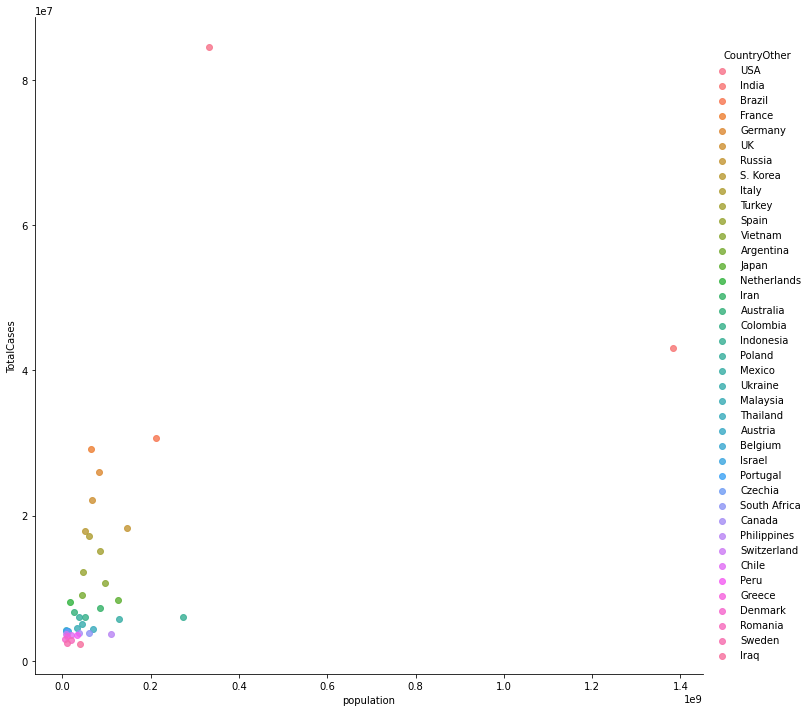

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)
g = sns.lmplot("population","TotalCases",data_class.head(40),hue= "CountryOther",fit_reg=False,height=10)

* on remarque que le nombre des cas  dépend  du volume de la  population ,par exemple on prend le cas usa de la population 331341050 ou on trouve 84473447 cas depuis le début de corona 
d'autre part on trouve iraq ou le nombre des cas équal a 2,327,269 avec une population 40,22 millions ** 

In [ ]:
import plotly.graph_objects as go

months = data_class.head(30)['CountryOther']

fig = go.Figure()
fig.add_trace(go.Bar(
    x=months,
    y=data_class.head(30)['TotalDeaths'],
    name='Total Deaths',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=months,
    y=data_class.head(30)['TotalRecovered'],
    name='Total Recovered',
    marker_color='lightsalmon'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.

fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

**Dans la plupart des cas, on constate que les pays développés connaissent une total recovered très importante par rapport au nombre total deaths par exemple on prend le cas de usa ou on a total recorvered 81380775.0 et total deaths 1027285 d'autre part on prend un exemple des pays sous-développée par exemple  la south africa ou on trouve un total de recorvered 3,739,543 et un total de death 3,739,543 
**
 C'est totalement logique parce que les pays développés ont les moyens tels que  : les médicaments et les hopitaux.

In [ ]:
import plotly.graph_objects as go

months = data_class[140:200]['CountryOther']

fig = go.Figure()
fig.add_trace(go.Bar(
    x=months,
    y=data_class[140:200]['TotalDeaths'],
    name='Total Deaths',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=months,
    y=data_class[140:200]['TotalRecovered'],
    name='Total Recovered',
    marker_color='lightsalmon'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.

fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

*Dans la première figure nous avons présenter les cas guérisons et les morts pour les pays les plus touchés .Maintenat nous avons présenter cette relation pour les pays qui n'ont pas beaucoups des cas , on constate la meme chose toujours les cas guérisons plus aux morts et les pays les plus développés n'ont pas le maximum des morts*

****